# Rolling a virtual dice II

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/dice.jpg" width=15% alt="(display image of dice)" >



### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme()

## Simulation of rolling a dice til you get a six


In many children's games, players need to roll a six before their counter can start moving round the board.

<ul>
<li>What is the probability that you will need four or more tries to roll a six?
</ul>

You may recall from school maths that the way we work this out is to calculate the probability that we did *not* obtain a six on any of rolls 1, 2 or 3. As the dice has six sides, the probability of not obtaining a six on each dice roll is $\frac{5}{6}$

As each event is independent, we can multiply the probabilities together:

$$ \frac{5}{6} \times \frac{5}{6} \times \frac{5}{6} = \frac{125}{216}$$

In other words, the chance that a player needs four or more turns to roll a six is slightly over half.

### <tt>while</tt> loop

If we want to simulate rolling a dice til we get a six, we need to use the <tt>while</tt> loop.

The <tt>while</tt> loop is a loop that keeps repeating until some criterion is fulfilled.

This is in contrast to the <tt>for</tt> loop which is run for a fixed number of cycles.

Try running the code below a few times - you should get a different outcome each time

In [2]:
r = 0 # create the variable r which counts how many times we rolled the virtual dice
d1 = 0 # create the variable d1 which stores the outcome of each dice roll

while d1!=6:
    r = r+1 # increase r by 1 each time we go round the loop
    d1 = np.random.randint(1,7)
    print('roll ' + str(r) + '. Outcome = ' + str(d1))

# the value of r when we leave the loop is how many rolls were needed to get a six
print('Total rolls needed to get a six: ' + str(r))

roll 1. Outcome = 6
Total rolls needed to get a six: 1


What happened there?

The code

<tt> while d1!=6: </tt>

means "check if the value of <tt>d1</tt> is 6; if not, repeat the commands inside the loop and come back to check again"

Initially <tt>d1=0</tt> (because that was the value we initially gave it).

Each time we 'roll the dice' we give d1 a new value and come back to check if it is now a six.

On each pass through the loop we also increment <tt>r</tt> (increase the value of <tt>r</tt> by one) to count how many times we rolled the dice.

<ul>
<li> find the places in the code where these operations are done, to check you understand
</ul>

When a six is obtained (d1=6) we stop going round the loop. The value of <tt>r</tt> at that point tells us how many rolls were needed to obtian a six.

## Repeated <tt>while</tt> loop

How often do we need to wait 2,3,4 or more trials to get a six?

We can simulate this by repeating our <tt>while</tt> loop lots of times and each time, 
recording how many times we needed to roll the dice to get a six.

You can think of each repeat of the 'experiment' as one player trying to roll a six and recording how many rolls it took to get one.

In [3]:
# let's start by simulating 10 'players' each trying to get a six
nPlayers = 10
rollsNeeded = np.empty(nPlayers)

for i in range(nPlayers):

    r = 0 # create the variable r which counts how many times we rolled the virtual dice
    d1 = 0 # create the variable d1 which stores the outcome of each dice roll

    while d1!=6:
        r = r+1
        d1 = np.random.randint(1,7)
    
    # the value of r when we leave the loop is how many rolls were needed to get a six
    rollsNeeded[i] = r

We should have created an array of 10 numbers, each of which is the number of rolls a player needed to get a six. 

Let's check what's in there.

In [4]:
rollsNeeded

array([ 2.,  3., 11.,  5.,  6.,  8.,  1.,  2.,  4.,  3.])

How many times did someone need 5 or more rolls to get a six?

Run the simulation again - the answer should have changed.

We will probably want to simulate a lot more than 10 players, but to do this we need to automatically count how many of them needed 5 or more rolls as it will beb too cumbersome to count them by hand.

We can do that using the function <a href="https://numpy.org/doc/stable/reference/generated/numpy.unique.html"><tt>np.unique</tt></a> which returns a list of the unique values in an array and (optionally) how many of each there were

In [5]:
scores, counts = np.unique(rollsNeeded, return_counts=True)
print('unique values = ' + str(scores))
print('counts =        ' + str(counts))

unique values = [ 1.  2.  3.  4.  5.  6.  8. 11.]
counts =        [1 2 2 1 1 1 1 1]


Check if you understand how these values relate to the array <tt>rollsNeeded</tt> above 

### Scale it up

Now we can increase the number of simulated 'players' greatly to try and get a relialbe estimate of the proportion of players who will need 5 or more rolls to get a six.

In [6]:
# let's simulate 10,000 players
nPlayers = 10000
rollsNeeded = np.empty(nPlayers)

for i in range(nPlayers):

    r = 0 # create the variable r which counts how many times we rolled the virtual dice
    d1 = 0 # create the variable d1 which stores the outcome of each dice roll

    while d1!=6:
        r = r+1
        d1 = np.random.randint(1,7)
    
    # the value of r when we leave the loop is how many rolls were needed to get a six
    rollsNeeded[i] = r
    
# count up how many of each individual score there are
scores, counts = np.unique(rollsNeeded, return_counts=True)

It will probably be easier to see the pattern if we plot how many players needed each number of rolls

NameError: name 'nTrials' is not defined

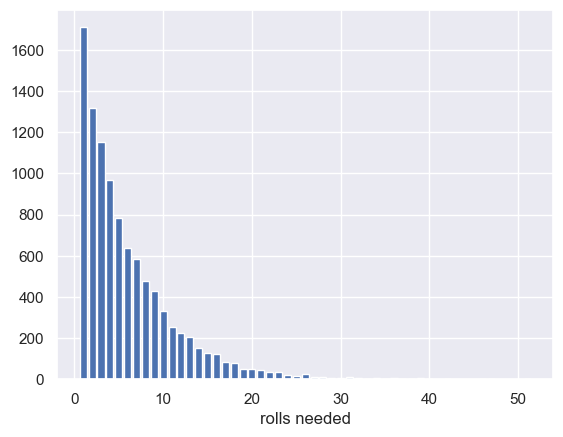

In [7]:
# plot the nummber of players who needed 1,2,3,4....etc rolls to get a six
plt.bar(scores, height=counts)
plt.xlabel('rolls needed')
plt.ylabel('frequency out of ' + str(nTrials) + ' trials')
plt.show()

Did it surprise you that the most likely number of rolls needed (mode of the distribution) is 1?

When you think about it:
<ul>
    <li>The chance of getting a six on Roll 1 is $\frac{1}{6}$
    <li>The chance of getting a six on Roll 2 is $\frac{1}{6} \times \frac{5}{6}$, that is, the chance of a six on Roll 2, multiplied by the chance of NO six on Roll 1 (as you wouldn't have done a second roll if the first roll had yielded a six)
    <li>The chance of getting a six on Roll 3 is $\frac{1}{6} \times \frac{5}{6} \times \frac{5}{6}$ ...
</ul>

### So how often do you need 5 or more trials to get a six?

Of course, we could work this out using equations as above, 
but for the sake of understanding the simulation process, let's see how often 
we needed 5 or more trials in our simulation



In [15]:
np.count_nonzero(rollsNeeded>=5) # actual number of trials on which 10 or more rolls were needed

486

In [16]:
100 * np.count_nonzero(rollsNeeded>=5)/nPlayers # same thing, as a percentage of trials

48.6

Let's break that down.

We previously stored the number of rolls needed ot get a six on each of our 10000 simulated trials in the array <tt>rollsNeeded</tt>

The code:

<tt>rollsNeeded>=10</tt>

check which of these values are greater than 10.

It's easier to see how this works in an eample using smaller array:

In [12]:
a = np.array([1,2,3,4,5]) # create a simple numpy array
a>=4 # check whether each element is >= 4

array([False, False, False,  True,  True])

In the code above, we created an array of 10000 "True" or "False"s, corresponding to each of our 10000 trials - 
"True" if 10 or more rolls were needed to obtain a six and "False" otherwise.

The next bit of code 

<tt>np.count_nonzero(rollsNeeded>=10)</tt>

simply counts how many "True"s there were in that array.

Let's look again with our simple example:

In [13]:
a = np.array([1,2,3,4,5]) # create a simple numpy array
np.count_nonzero(a>=4) # check whether each element is >= 3

2

In other words, of the numbers 1,2,3,4 and 5, two are >=4

<ul>
    <li> Can you change the code block below to work out what percentage of our 10000 simulated trials required:
    <ul> 
        <li>at least 20 dice rolls 
        <li>more than 20 dice rolls
    </ul>to obtain a six?
</ul>

In [23]:
100 * np.count_nonzero(rollsNeeded>=10)/10000

18.96